In [1]:
import matplotlib.pyplot as plt
from keras import Input, Sequential
from keras.src.layers import LSTM, Dense
from keras.src.utils import plot_model
from plot_keras_history import plot_history

from load_data.generate_data import prepare_train_val_test

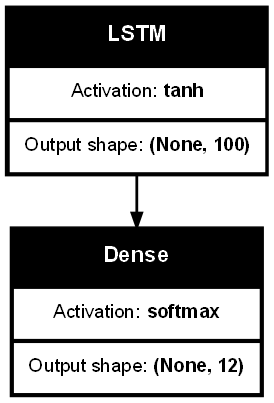

In [2]:
n_features = 23
n_classes = 12
segment_size = 50
batch_size = 32

model = Sequential(
    [
        Input(shape=(segment_size, n_features)),
        LSTM(100),
        Dense(n_classes, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)


plot_model(
    model,
    to_file="model_architecture.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=True,
    dpi=100,
    show_layer_activations=True,
    show_trainable=False,
)

In [3]:
train, val, test, train_steps, val_steps, test_steps = prepare_train_val_test(
    segment_size=segment_size, batch_size=batch_size, n_features=n_features, n_shifts=5
)
history = model.fit(
    train,
    validation_data=val,
    epochs=20,
    steps_per_epoch=train_steps,
    validation_steps=val_steps,
)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 36s 264ms/step - accuracy: 0.2164 - loss: 2.2497 - val_accuracy: 0.6189 - val_loss: 1.4220
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.6765 - loss: 1.1386 - val_accuracy: 0.6509 - val_loss: 1.2083
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 33s 262ms/step - accuracy: 0.7876 - loss: 0.7664 - val_accuracy: 0.7398 - val_loss: 0.8764
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 33s 263ms/step - accuracy: 0.9008 - loss: 0.4089 - val_accuracy: 0.7663 - val_loss: 0.8079
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 32s 253ms/step - accuracy: 0.9332 - loss: 0.2820 - val_accuracy: 0.7072 - val_loss: 0.8313
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 32s 255ms/step - accuracy: 0.9476 - loss: 0.2256 - val_accuracy: 0.7937 - val_loss: 0.6998
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 28s 217ms/step - accuracy: 0.9618 - loss: 0.1661 - val_accuracy: 0.7959 - val_loss: 0.7020
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 29s 227ms/step - accuracy: 0.9684 - loss: 0

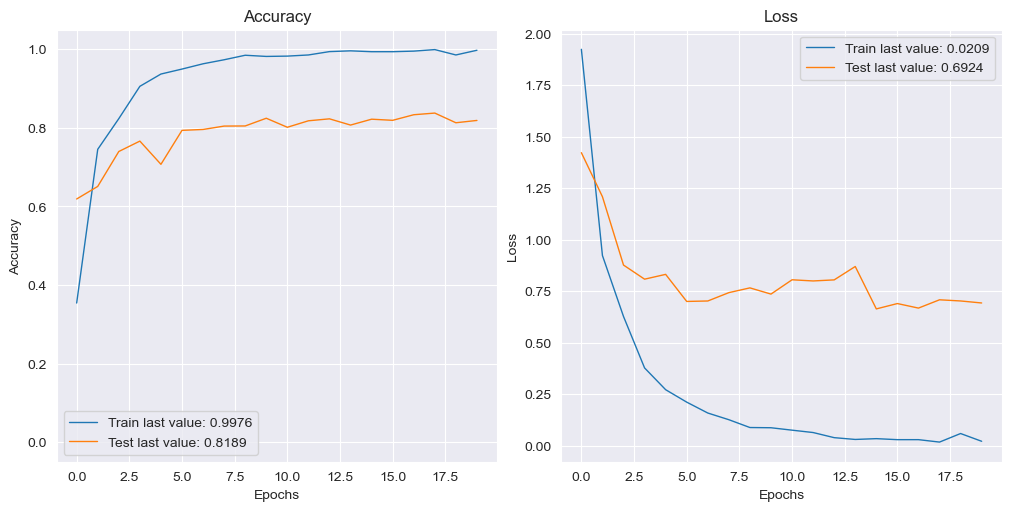

In [4]:
plt.show(plot_history(history))

In [5]:
model.evaluate(test, steps=test_steps)

219/219 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.8821 - loss: 0.4453


[0.4675970673561096, 0.8869004845619202]